Importing required modules

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
os.chdir('C:\\Users\\DELL\\Downloads\\DATA')

### DATA COLLECTION
+ 
Used S&P case- shiller housing price index as the target(y) variable 

In [4]:
df_hpi = pd.read_csv('CSUSHPISA (1).csv')   # The S&P Case-Shiller Housing Price Index is taken as the y variable

df_supply = pd.read_csv('House_supply.csv')   # Months of supply is the basic measure of supply itself in the real estate market
df_unra = pd.read_csv('Unemployment _rate.csv')  # Unemployment can also affect both demand and supply in the real estate industry
df_mortgage = pd.read_csv('Mortgage.csv')  #Mortgage rates are a huge factor that decide how well the real estate market will perform
df_gdp = pd.read_csv('GDP_monthly.csv')  #The GDP is a measure of output of the economy overall
df_pce = pd.read_csv('PCE.csv')  #The extent to which people are utilizing their personal income for savings matters in overall investments and capital availability
df_dff = pd.read_csv('DFF.csv')  #Federal Funds Rate influences multiple factors in the economy, beyond just the real estate market

#### Features taken into account
+ 
CSUSHPISA - S&P Case-Shiller Housing Price Index   
+ 
UNRATE    - Unemployment Rate  (https://fred.stlouisfed.org/series/UNRATE)
+ 
MSACSR    - Months of supply  (https://fred.stlouisfed.org/graph/?g=zneA)
+ 
MORTGAGE30US  - Mortgage rate  (https://fred.stlouisfed.org/graph/?g=zneW)
+ 
USALORSGPNOSTSAM - US GDP (https://fred.stlouisfed.org/graph/?g=znfe)
+ 
PCE   - Personal Consumption Expenditures  (https://fred.stlouisfed.org/series/PCE)
+ 
DFF   - Federal Funds Effective Rate  (https://fred.stlouisfed.org/series/DFF#0)

In [5]:
df_hpi.rename({'DATE':'Date'},axis =1,inplace = True)
df_hpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       276 non-null    object 
 1   CSUSHPISA  276 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


In [6]:
# Concatinating all the dataframes to form one master dataframe for the task 
df = pd.concat([df_hpi,df_unra,df_supply,df_mortgage,df_gdp,df_pce,df_dff],axis =1,join ='inner')

### DATA ANALYSIS AND PREPROCESSING

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              276 non-null    object 
 1   CSUSHPISA         276 non-null    float64
 2   DATE              276 non-null    object 
 3   UNRATE            276 non-null    float64
 4   DATE              276 non-null    object 
 5   MSACSR            276 non-null    float64
 6   DATE              276 non-null    object 
 7   MORTGAGE30US      276 non-null    float64
 8   DATE              276 non-null    object 
 9   USALORSGPNOSTSAM  276 non-null    float64
 10  DATE              276 non-null    object 
 11  PCE               276 non-null    float64
 12  DATE              276 non-null    object 
 13  DFF               276 non-null    float64
dtypes: float64(7), object(7)
memory usage: 30.3+ KB


In [8]:
df.head()

,Date,CSUSHPISA,DATE,UNRATE,DATE,MSACSR,DATE,MORTGAGE30US,DATE,USALORSGPNOSTSAM,DATE,PCE,DATE,DFF
0,2000-01-01,100.551,2000-01-01,4.0,2000-01-01,4.3,2000-01-01,8.2100,2000-01-01,101.517998,2000-01-01,6542.9,2000-01-01,5.448387
1,2000-02-01,101.339,2000-02-01,4.1,2000-02-01,4.3,2000-02-01,8.3250,2000-02-01,101.580315,2000-02-01,6625.3,2000-02-01,5.734828
2,2000-03-01,102.126,2000-03-01,4.0,2000-03-01,4.3,2000-03-01,8.2400,2000-03-01,101.656324,2000-03-01,6686.5,2000-03-01,5.853548
3,2000-04-01,102.922,2000-04-01,3.8,2000-04-01,4.4,2000-04-01,8.1525,2000-04-01,101.729060,2000-04-01,6679.1,2000-04-01,6.019667
4,2000-05-01,103.677,2000-05-01,4.0,2000-05-01,4.4,2000-05-01,8.5150,2000-05-01,101.771968,2000-05-01,6709.7,2000-05-01,6.268065


In [9]:
# Converting "Date" feature into datetime data type and breaking it down to year, month and day 
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [10]:
# dropping the date column
df.drop(['DATE'],axis =1,inplace=True)

In [11]:
# Checking for null or missing values
df.isnull().sum()

Date                0
CSUSHPISA           0
UNRATE              0
MSACSR              0
MORTGAGE30US        0
USALORSGPNOSTSAM    0
PCE                 0
DFF                 0
year                0
month               0
day                 0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              276 non-null    datetime64[ns]
 1   CSUSHPISA         276 non-null    float64       
 2   UNRATE            276 non-null    float64       
 3   MSACSR            276 non-null    float64       
 4   MORTGAGE30US      276 non-null    float64       
 5   USALORSGPNOSTSAM  276 non-null    float64       
 6   PCE               276 non-null    float64       
 7   DFF               276 non-null    float64       
 8   year              276 non-null    int64         
 9   month             276 non-null    int64         
 10  day               276 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 23.8 KB


In [13]:
df.describe()

,CSUSHPISA,UNRATE,MSACSR,MORTGAGE30US,USALORSGPNOSTSAM,PCE,DFF,year,month,day
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.0
mean,171.887891,5.857971,5.874638,5.010241,99.893805,11042.547101,1.644184,2011.000000,6.500000,1.0
std,44.743617,1.959418,1.945103,1.361124,1.254835,2825.569185,1.867613,6.645299,3.458323,0.0
min,100.551000,3.500000,3.300000,2.684000,91.633777,6542.900000,0.049000,2000.000000,1.000000,1.0
25%,142.144250,4.400000,4.300000,3.901750,99.560583,8928.975000,0.131774,2005.000000,3.750000,1.0
50%,165.859500,5.400000,5.400000,4.820000,99.939277,10713.200000,1.008621,2011.000000,6.500000,1.0
75%,188.175750,6.700000,6.700000,6.112125,100.516710,13051.275000,2.393226,2017.000000,9.250000,1.0
max,304.817000,14.700000,12.200000,8.515000,101.861821,17778.200000,6.544516,2022.000000,12.000000,1.0


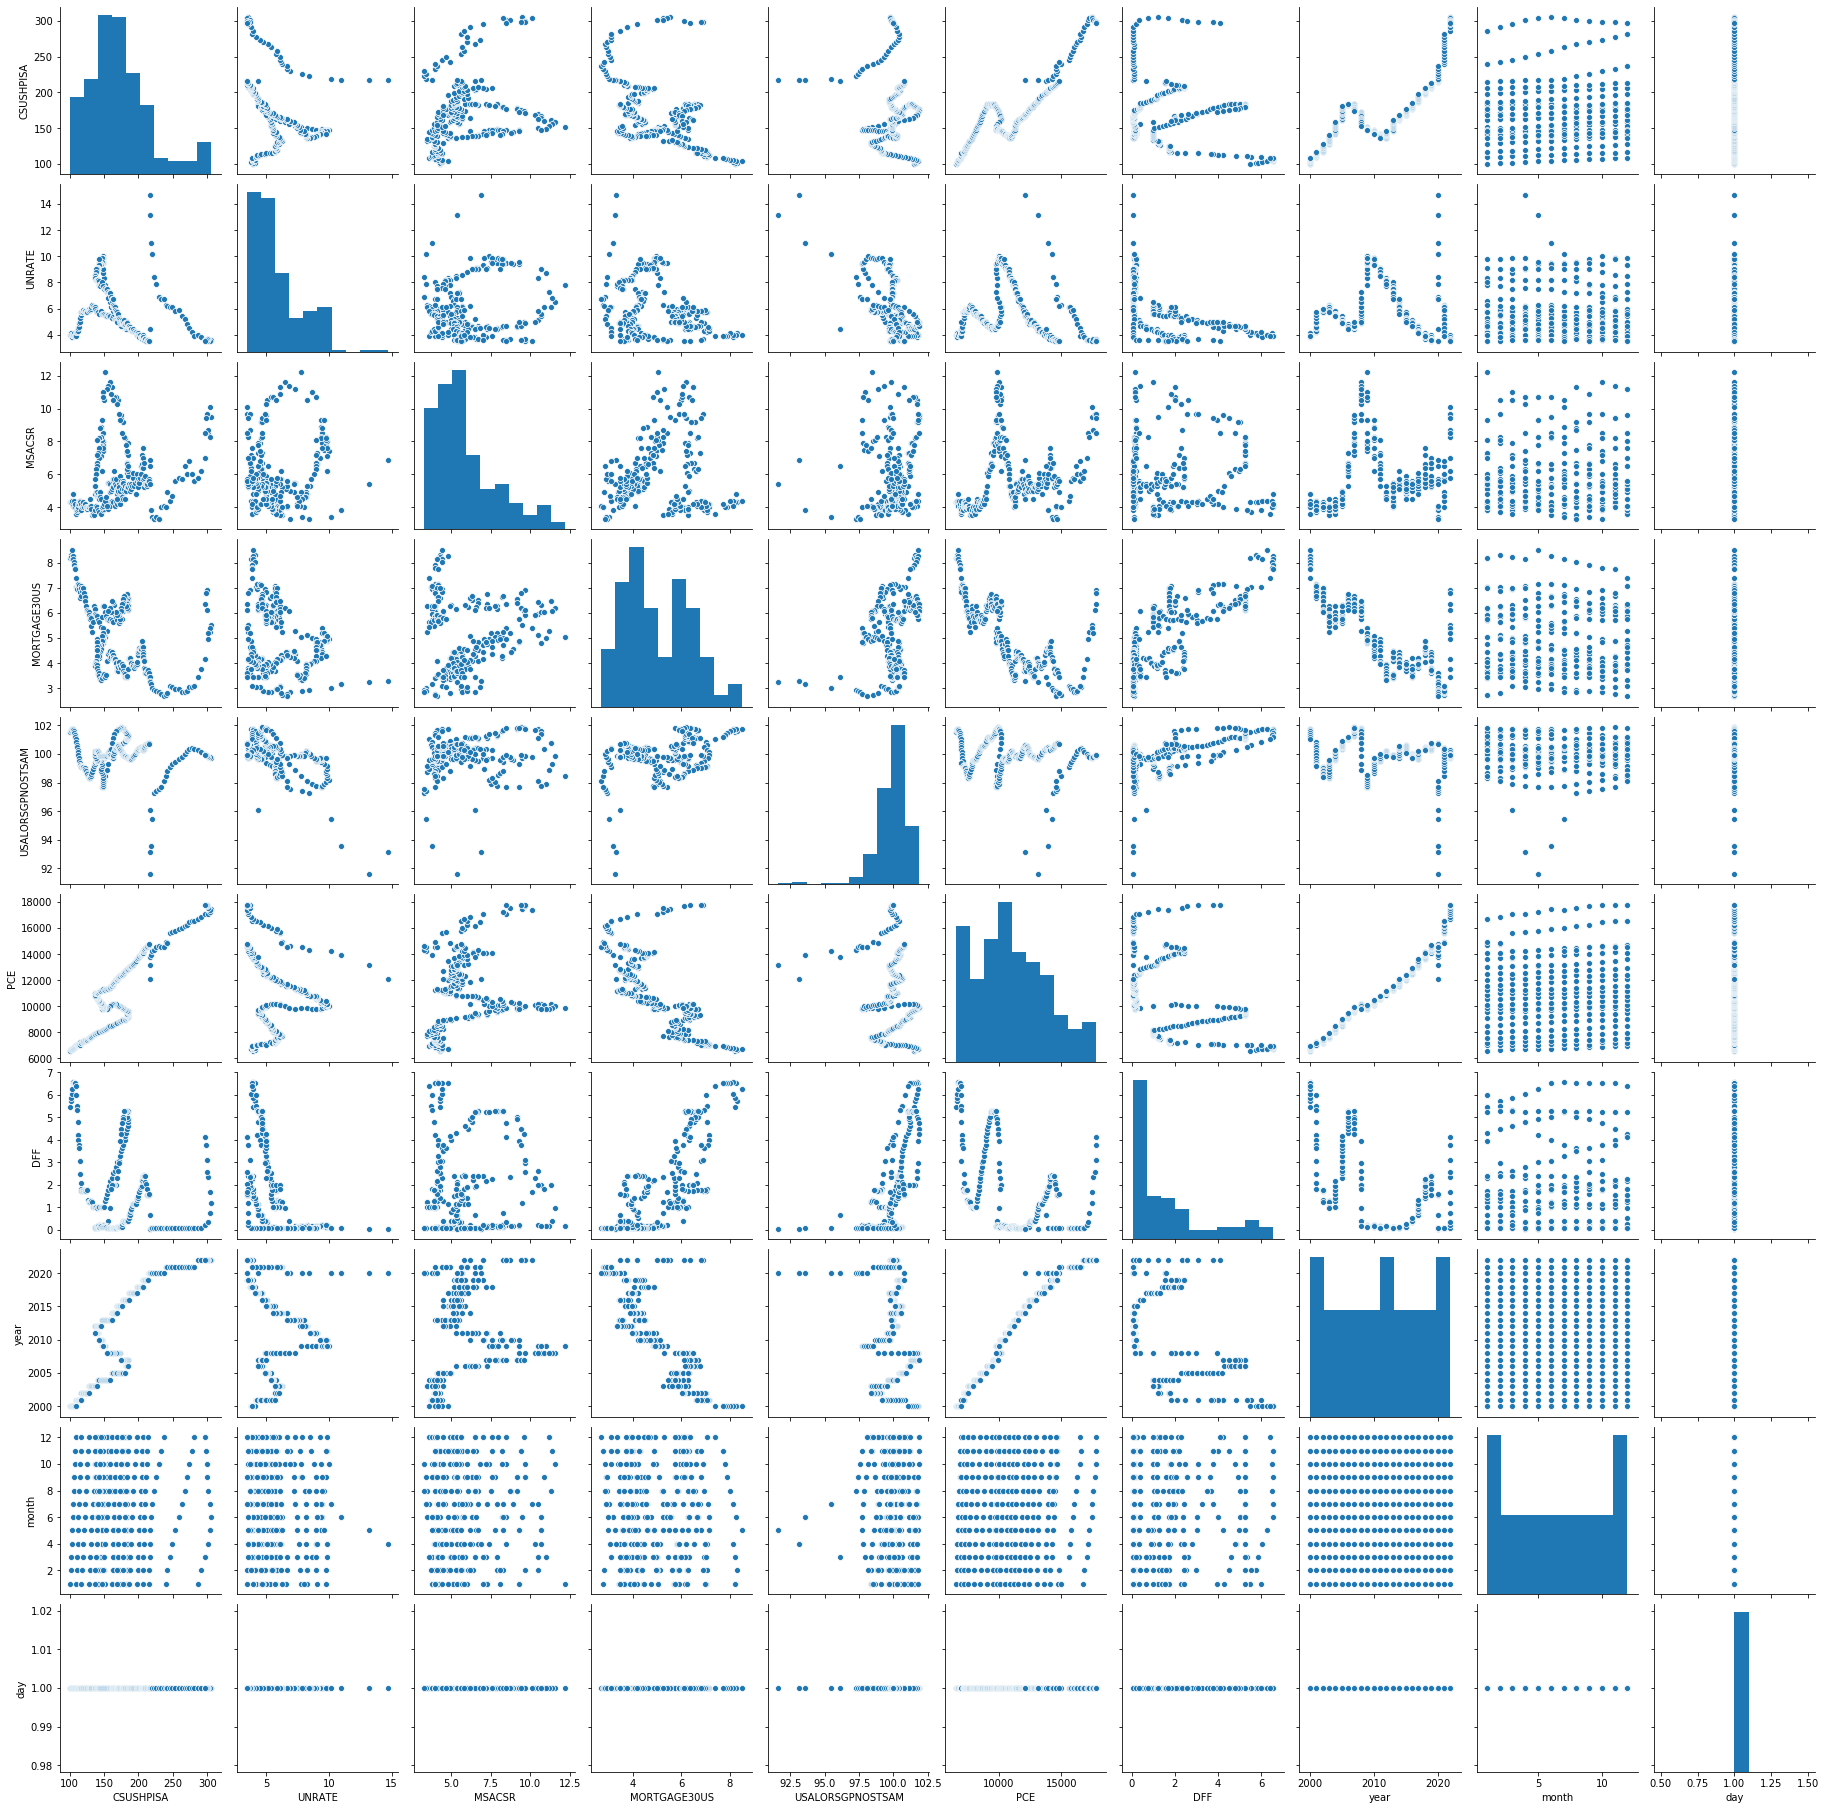

In [14]:
sns.pairplot(df)

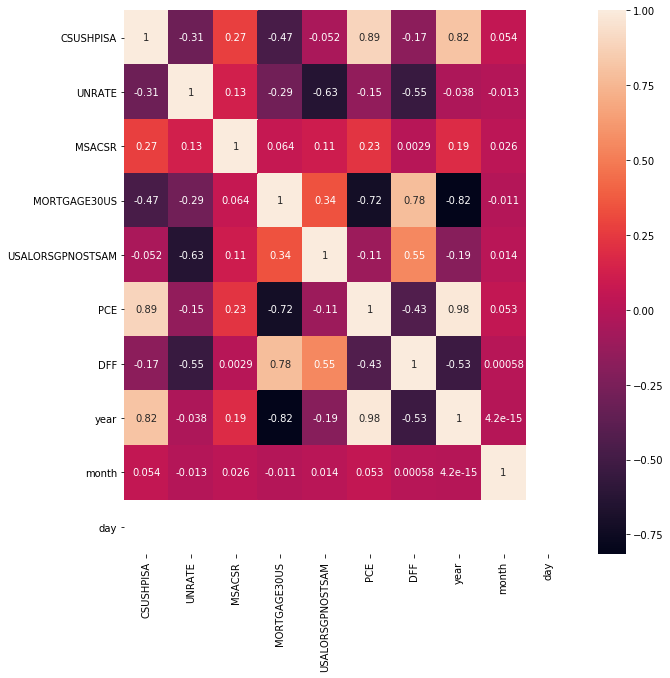

In [15]:
# plotting the heatmap to find correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [16]:
# Extracting continuous numerical features(float datatype)
numeric_features =[feature for feature in df.columns if df[feature].dtypes == 'float64']
numeric_features

['CSUSHPISA',
 'UNRATE',
 'MSACSR',
 'MORTGAGE30US',
 'USALORSGPNOSTSAM',
 'PCE',
 'DFF']

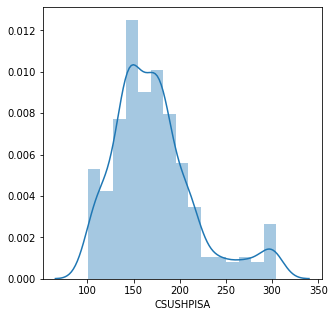

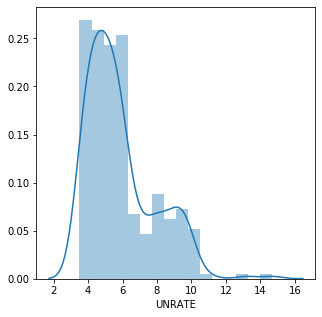

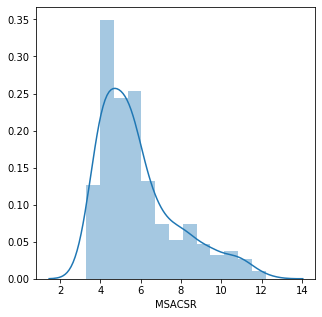

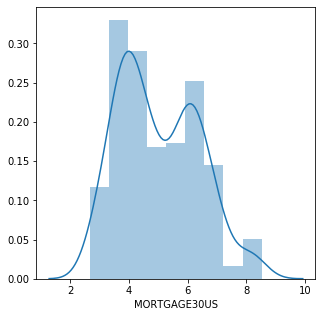

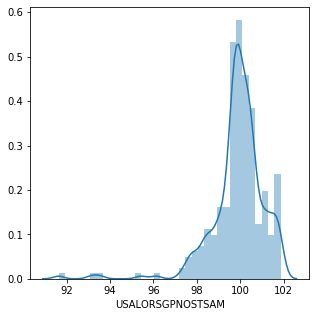

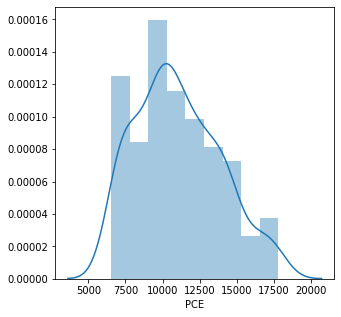

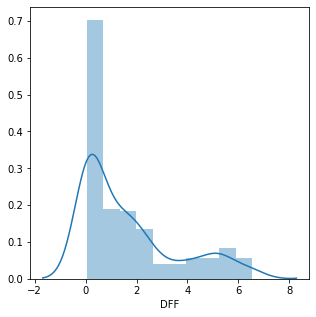

In [17]:
for feature in numeric_features:
    plt.figure(figsize=(5,5))
    sns.distplot(df[feature])

features like UNRATE, DFF, USALORSGPNOSTSAM, MSACSR are skewed

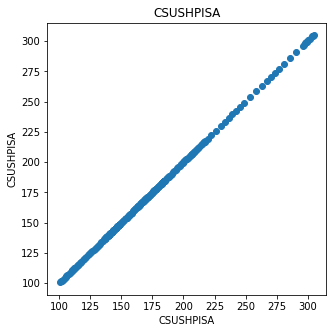

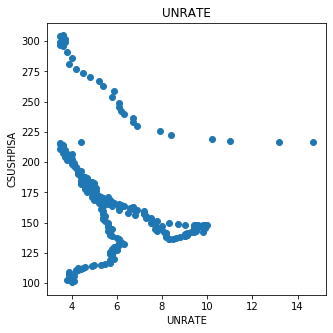

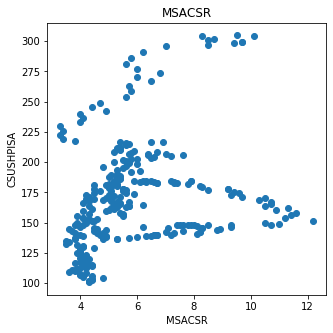

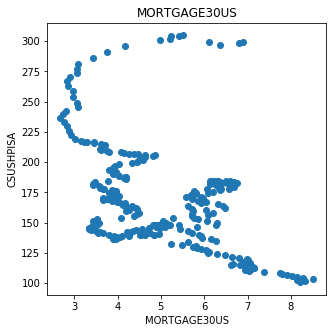

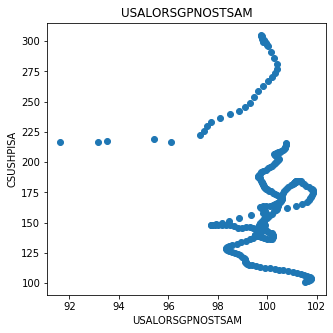

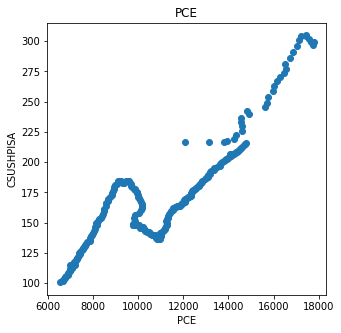

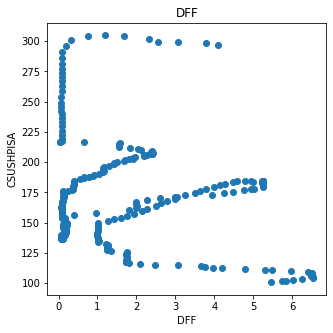

In [18]:
# Plotting numeric continous features with respect to CSUSHPISA to see the relations 
for feature in numeric_features:
    plt.figure(figsize=(5,5))
    plt.scatter(x=df[feature],y=df['CSUSHPISA'])
    plt.xlabel(feature)
    plt.ylabel('CSUSHPISA')
    plt.title(feature)

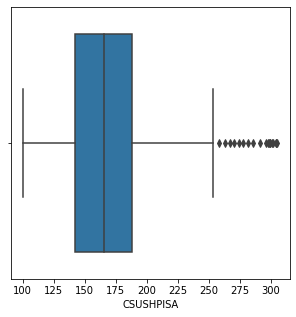

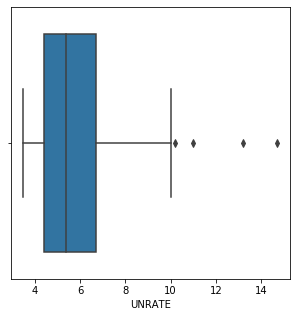

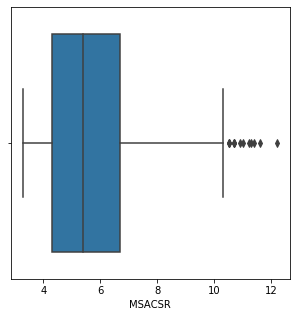

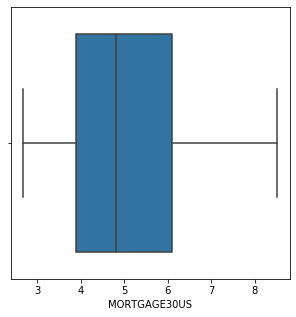

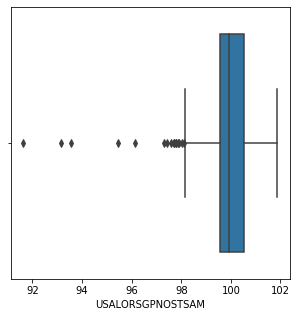

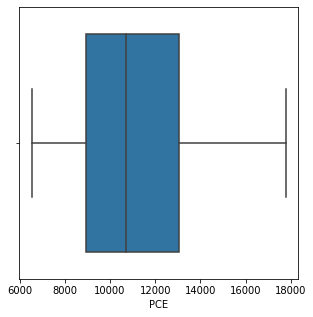

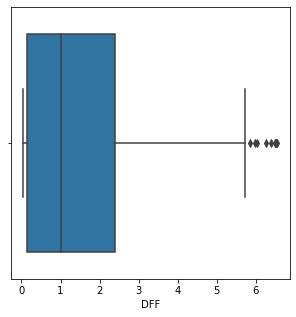

In [19]:
# Box plots to spot out the outliers
for feature in numeric_features:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[feature])

In [20]:
# log transformation of continous numerical features to deal with outliers 
for feature in numeric_features:
    df[feature] = np.log(df[feature])
df.describe()

,CSUSHPISA,UNRATE,MSACSR,MORTGAGE30US,USALORSGPNOSTSAM,PCE,DFF,year,month,day
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.0
mean,5.115843,1.718484,1.722478,1.574490,4.604027,9.276832,-0.438088,2011.000000,6.500000,1.0
std,0.245921,0.306950,0.302833,0.273848,0.012757,0.257198,1.555175,6.645299,3.458323,0.0
min,4.610665,1.252763,1.193922,0.987308,4.517800,8.786136,-3.015935,2000.000000,1.000000,1.0
25%,4.956842,1.481605,1.458615,1.361425,4.600766,9.097055,-2.026686,2005.000000,3.750000,1.0
50%,5.111141,1.686399,1.686399,1.572772,4.604563,9.279230,0.008583,2011.000000,6.500000,1.0
75%,5.237375,1.902108,1.902108,1.810275,4.610324,9.476640,0.872641,2017.000000,9.250000,1.0
max,5.719712,2.687847,2.501436,2.141829,4.623617,9.785728,1.878627,2022.000000,12.000000,1.0


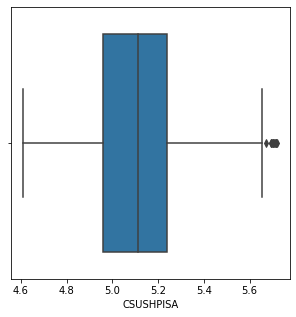

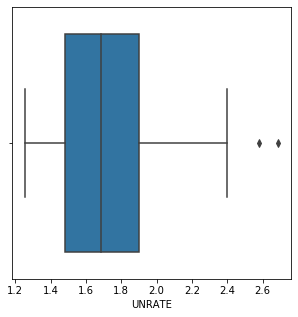

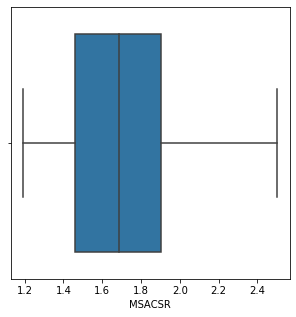

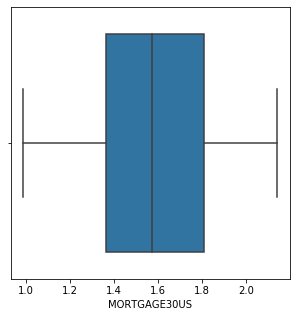

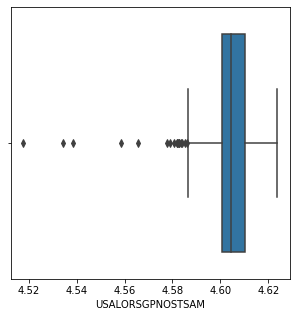

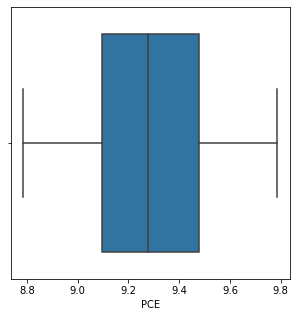

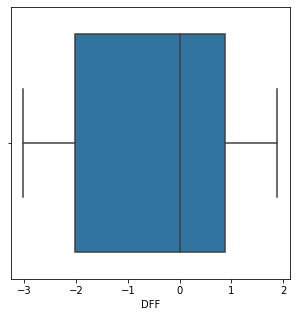

In [21]:
# We can clearly see that amount of outliers has decreased significantly
for feature in numeric_features:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[feature])

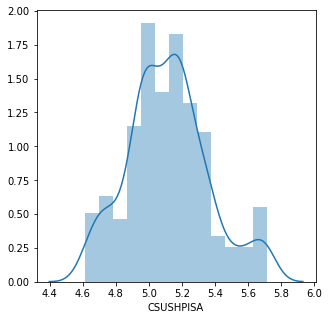

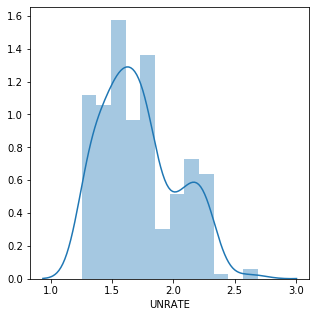

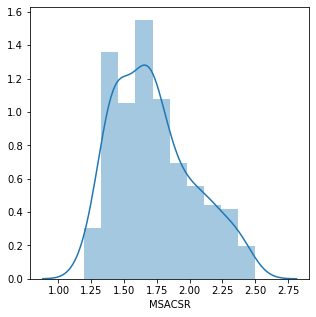

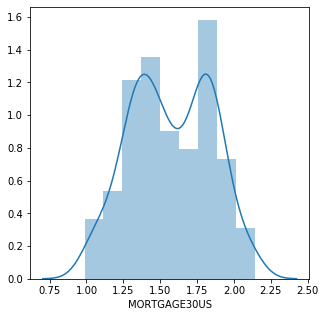

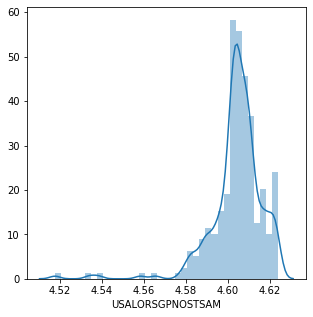

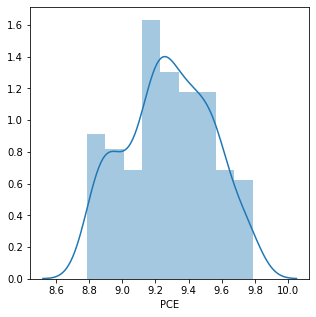

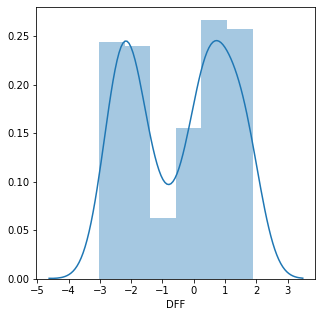

In [22]:
for feature in numeric_features:
    plt.figure(figsize=(5,5))
    sns.distplot(df[feature],kde=True)

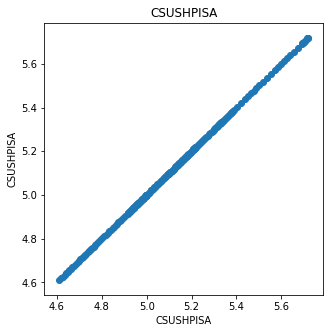

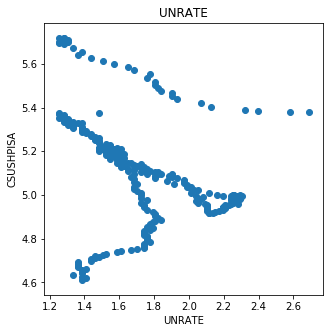

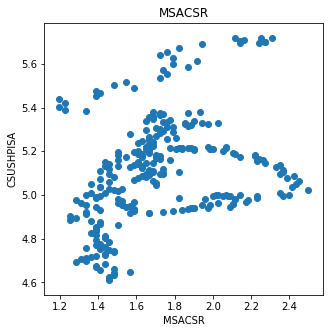

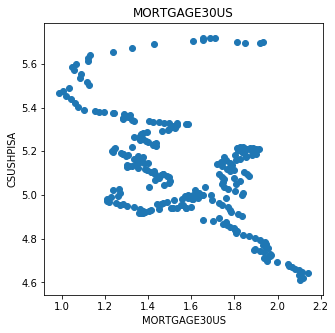

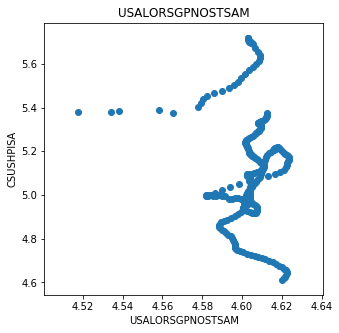

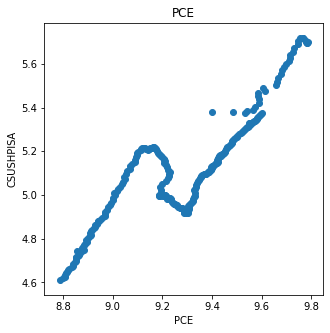

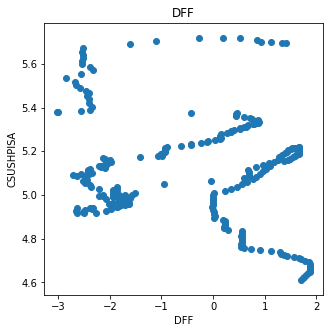

In [23]:
# plotting the transformed features against CSUSHPISA to see the updated relations
for feature in numeric_features:
    plt.figure(figsize=(5,5))
    plt.scatter(x=df[feature],y=df['CSUSHPISA'])
    plt.xlabel(feature)
    plt.ylabel('CSUSHPISA')
    plt.title(feature)

It is evident from the above graphs that CSUSHPISA has strong correlation with PCE 

In [24]:
# Extrating discrete numeric features for analysis 
numeric_discrete_features =[feature for feature in df.columns if df[feature].dtypes == 'int64']
numeric_discrete_features

['year', 'month', 'day']

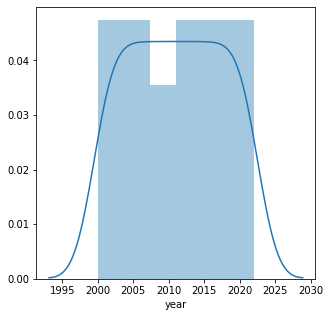

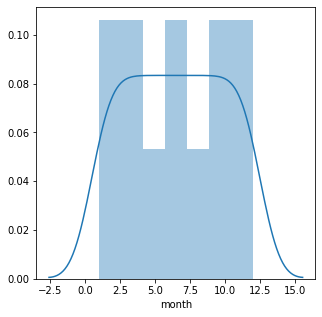

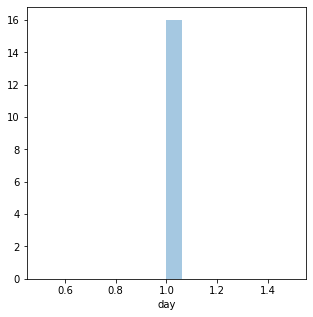

In [25]:
# Plotting to see the trends
for feature in numeric_discrete_features:
    plt.figure(figsize=(5,5))
    sns.distplot(df[feature],kde=True)

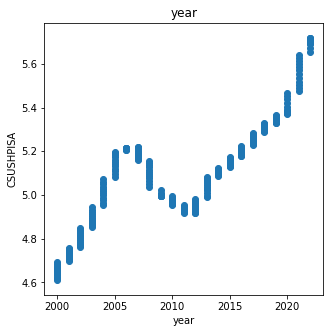

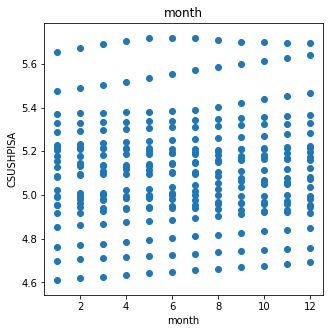

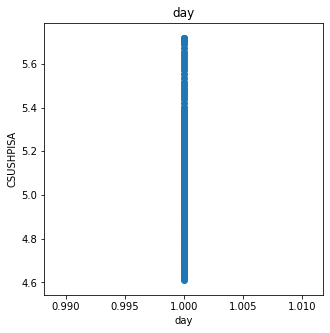

In [26]:
for feature in numeric_discrete_features:
    plt.figure(figsize=(5,5))
    plt.scatter(x=df[feature],y=df['CSUSHPISA'])
    plt.xlabel(feature)
    plt.ylabel('CSUSHPISA')
    plt.title(feature)

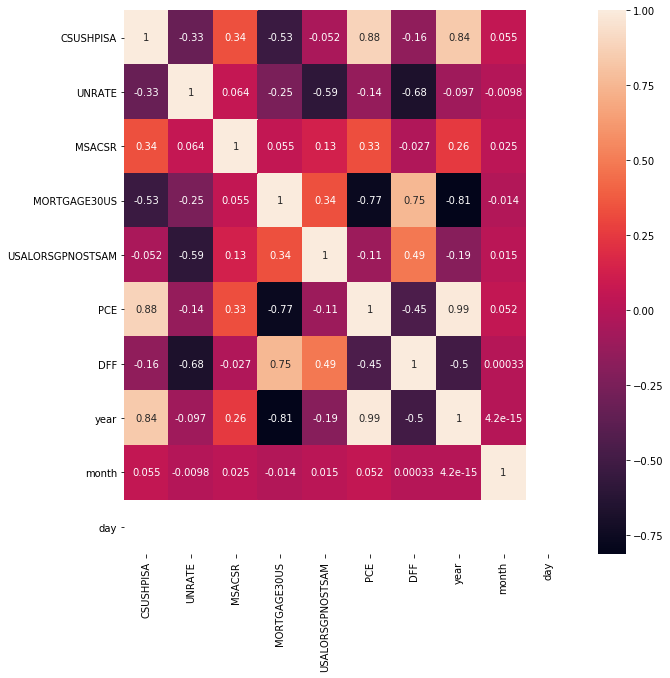

In [27]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot = True)

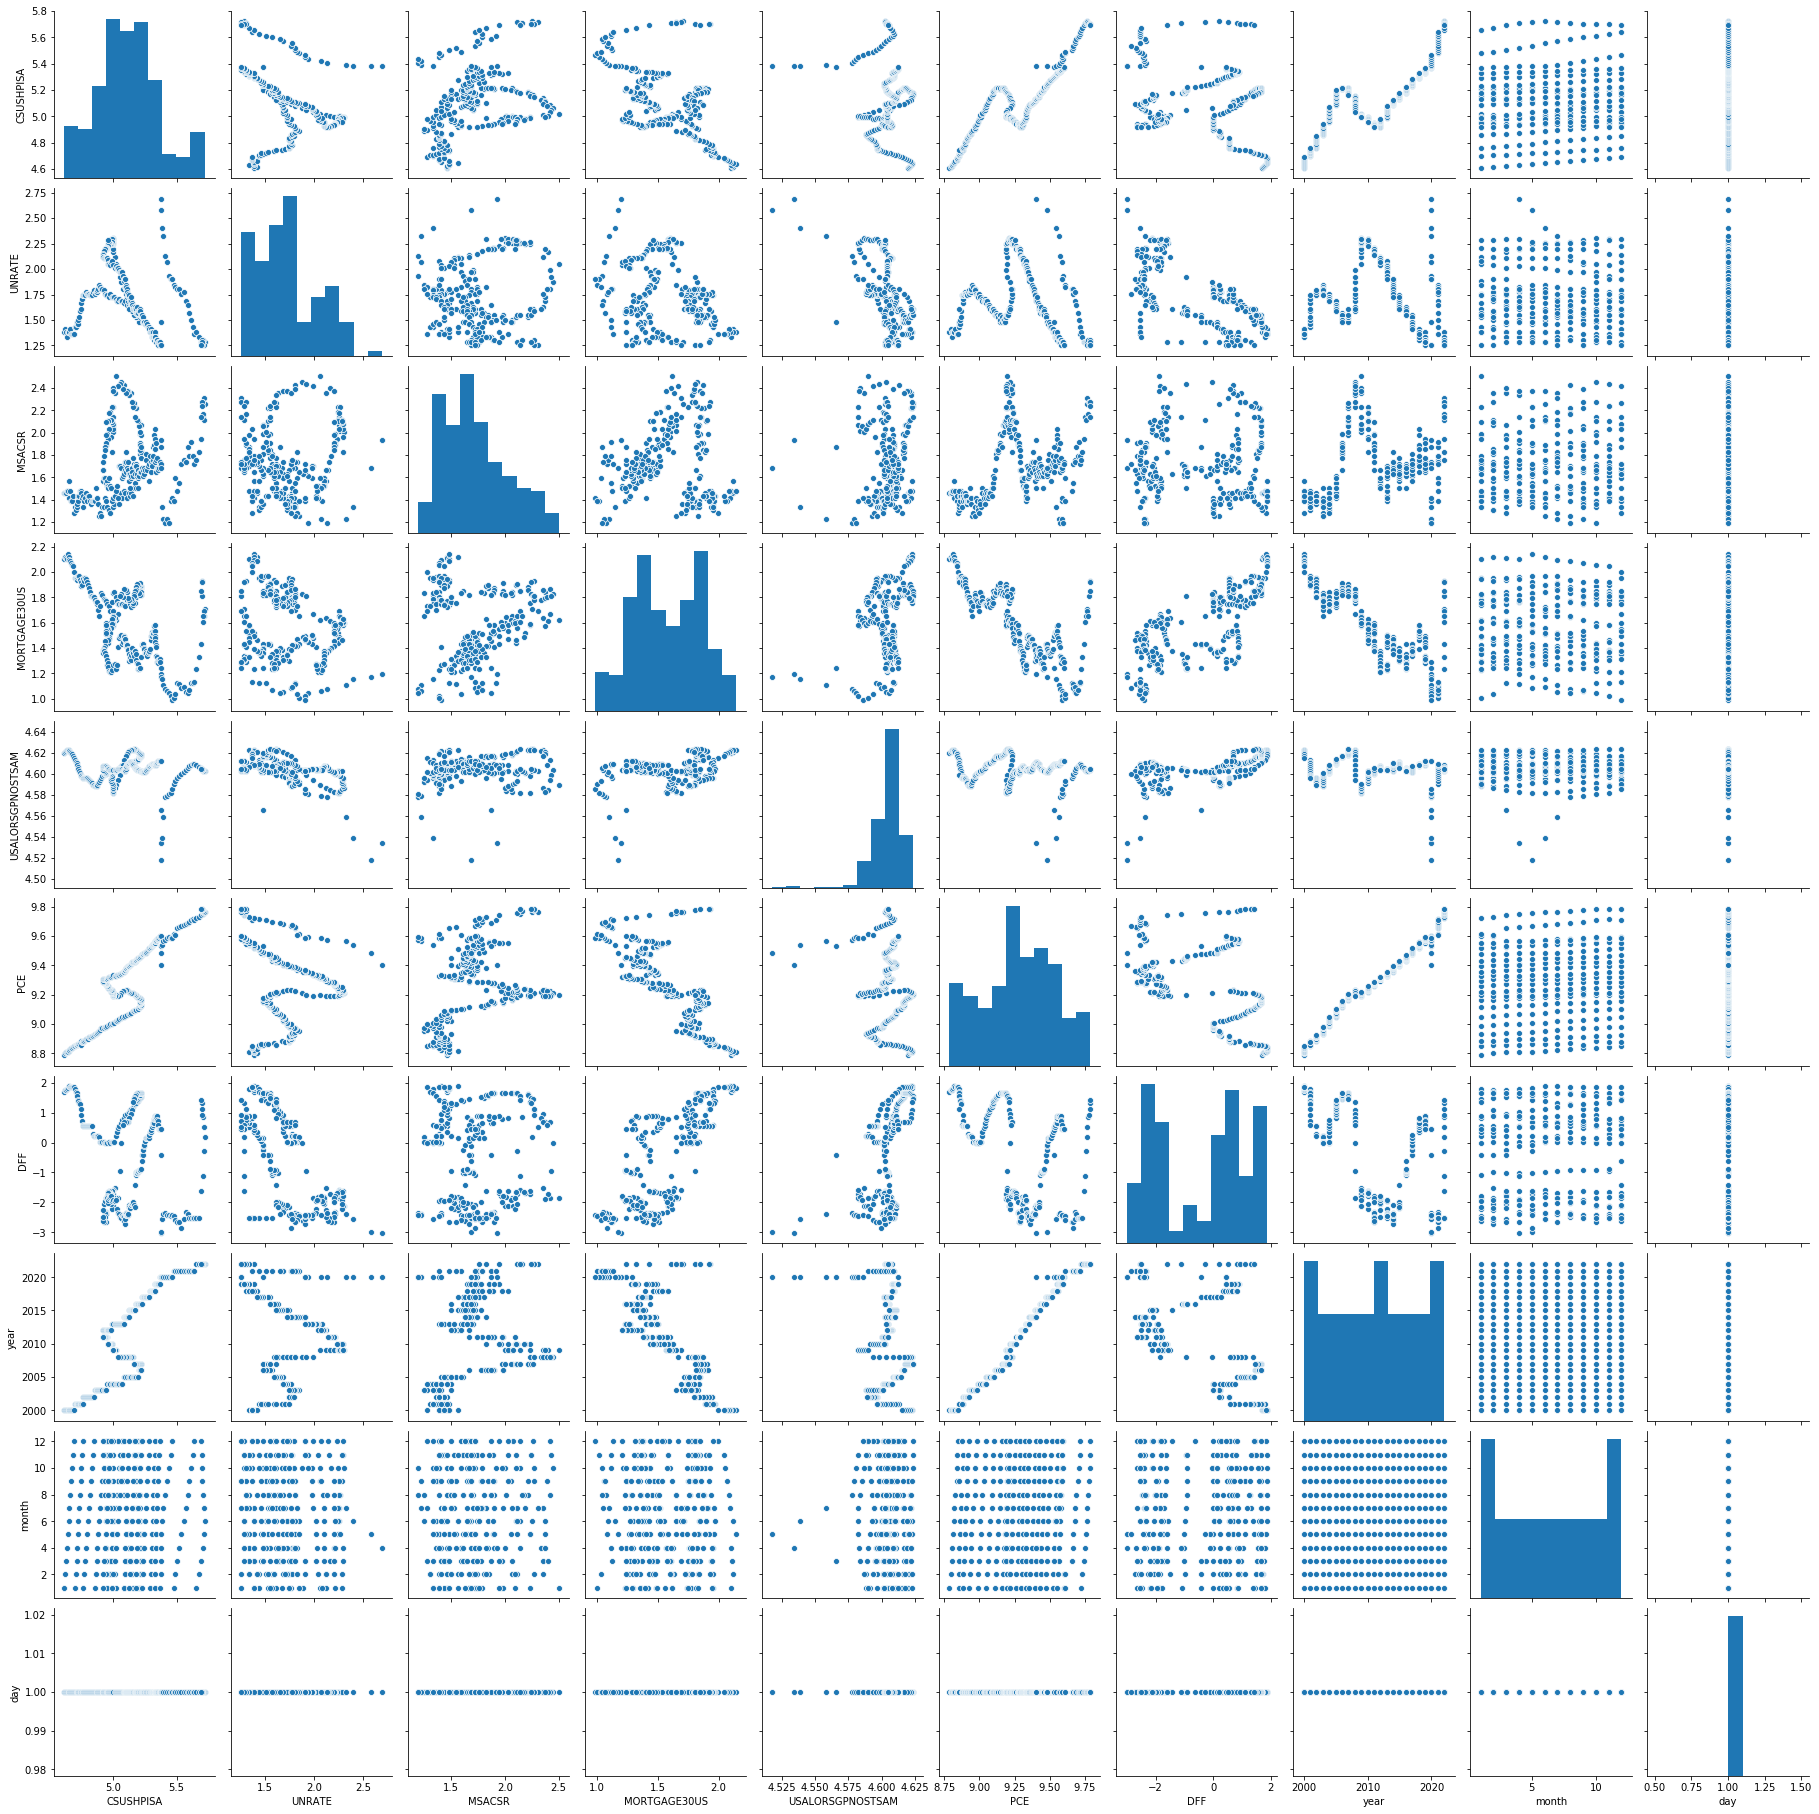

In [28]:
# Pairplot for an overall overview of relations 
sns.pairplot(df)

### TRAINING

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector

In [30]:
y = df['CSUSHPISA']
x = df.drop(['CSUSHPISA','Date'],axis=1)
x.shape,y.shape

((276, 9), (276,))

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 1,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((220, 9), (56, 9), (220,), (56,))

In [32]:
linear = LinearRegression()
forest = RandomForestRegressor(n_estimators= 200 ,max_depth=13)
gbr=GradientBoostingRegressor(n_estimators=200,learning_rate=0.2,max_depth=7,max_features='sqrt',random_state=10)

In [33]:
# model 1 - Linear regression
linear.fit(x_train,y_train)
predict_linear = linear.predict(x_test)
r2_score(y_test,predict_linear)

0.7970625802904249

In [34]:
# model 2 - Gradient Boosting Regressor
gbr.fit(x_train,y_train)
predict_gbr = gbr.predict(x_test)
r2_score(y_test,predict_gbr)

0.9899380143392433

In [35]:
# model 3 - Random Forest Regressor
forest.fit(x_train,y_train)
predict_forest = forest.predict(x_test)
r2_score(y_test,predict_forest)

0.9709761202483679

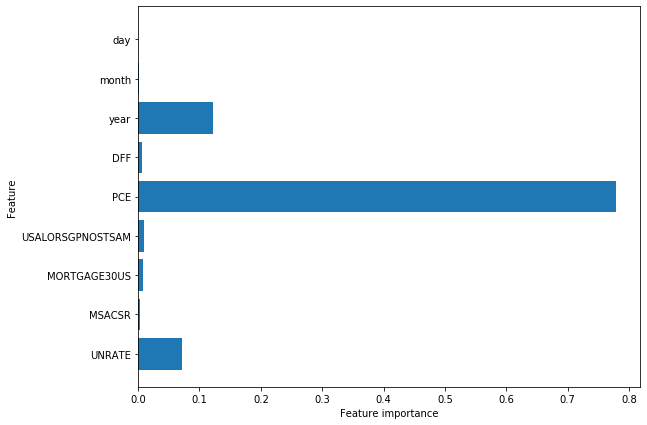

In [36]:
# Plotting the feature importance graph
plt.figure(figsize=(9,7))
n_features = x_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), x_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [37]:
feature = SequentialFeatureSelector(linear,k_features = 6,forward = False, verbose = 1, scoring='neg_mean_squared_error')
feature.fit(x,y)
feature_names = list(feature.k_feature_names_)
feature_names

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
Features: 8/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
Features: 7/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
Features: 6/6

['MSACSR', 'USALORSGPNOSTSAM', 'PCE', 'DFF', 'year', 'month']

In [38]:
feature = SequentialFeatureSelector(forest,k_features = 6,forward = False, verbose = 1, scoring='neg_mean_squared_error')
feature.fit(x,y)
feature_names = list(feature.k_feature_names_)
feature_names

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   14.9s finished
Features: 8/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   13.1s finished
Features: 7/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   12.1s finished
Features: 6/6

['MSACSR', 'USALORSGPNOSTSAM', 'PCE', 'year', 'month', 'day']

In [39]:
feature = SequentialFeatureSelector(gbr,k_features = 6,forward = False, verbose = 1, scoring='neg_mean_squared_error')
feature.fit(x,y)
feature_names = list(feature.k_feature_names_)
feature_names

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.1s finished
Features: 8/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.7s finished
Features: 7/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.1s finished
Features: 6/6

['MSACSR', 'MORTGAGE30US', 'PCE', 'year', 'month', 'day']

In [40]:
# 2nd iteration of models with lesser number of features
df1 = df.copy()

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              276 non-null    datetime64[ns]
 1   CSUSHPISA         276 non-null    float64       
 2   UNRATE            276 non-null    float64       
 3   MSACSR            276 non-null    float64       
 4   MORTGAGE30US      276 non-null    float64       
 5   USALORSGPNOSTSAM  276 non-null    float64       
 6   PCE               276 non-null    float64       
 7   DFF               276 non-null    float64       
 8   year              276 non-null    int64         
 9   month             276 non-null    int64         
 10  day               276 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 23.8 KB


In [42]:
df1.drop(['DFF','UNRATE','MORTGAGE30US'],axis =1,inplace =True)   # dropped features with less correlation 
df1.head()

,Date,CSUSHPISA,MSACSR,USALORSGPNOSTSAM,PCE,year,month,day
0,2000-01-01,4.610665,1.458615,4.620236,8.786136,2000,1,1
1,2000-02-01,4.618471,1.458615,4.620850,8.798651,2000,2,1
2,2000-03-01,4.626207,1.458615,4.621598,8.807846,2000,3,1
3,2000-04-01,4.633971,1.481605,4.622313,8.806739,2000,4,1
4,2000-05-01,4.641280,1.481605,4.622735,8.811310,2000,5,1


In [43]:
df1.corr()

,CSUSHPISA,MSACSR,USALORSGPNOSTSAM,PCE,year,month,day
CSUSHPISA,1.000000,0.338434,-0.052400,0.880041,8.370568e-01,5.521589e-02,NaN
MSACSR,0.338434,1.000000,0.132679,0.329559,2.556159e-01,2.501261e-02,NaN
USALORSGPNOSTSAM,-0.052400,0.132679,1.000000,-0.108819,-1.920971e-01,1.536613e-02,NaN
PCE,0.880041,0.329559,-0.108819,1.000000,9.893741e-01,5.169428e-02,NaN
year,0.837057,0.255616,-0.192097,0.989374,1.000000e+00,4.220575e-15,NaN
month,0.055216,0.025013,0.015366,0.051694,4.220575e-15,1.000000e+00,NaN
day,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
y1 = df1['CSUSHPISA']
x1 = df1.drop(['CSUSHPISA','Date'],axis=1)
x.shape,y.shape

((276, 9), (276,))

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,random_state = 1,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((220, 6), (56, 6), (220,), (56,))

In [46]:
# Linear Regression
linear.fit(x_train,y_train)
predict_linear = linear.predict(x_test)
r2_score(y_test,predict_linear)

0.7309662379183175

In [47]:
# Gradient Boosting Regressor
gbr.fit(x_train,y_train)
predict_gbr=gbr.predict(x_test)
r2_score(y_test,predict_gbr)

0.9758988476706834

In [48]:
# Random Forest Regressor
forest.fit(x_train,y_train)
predict_forest = forest.predict(x_test)
r2_score(y_test,predict_forest)

0.9835776363346285

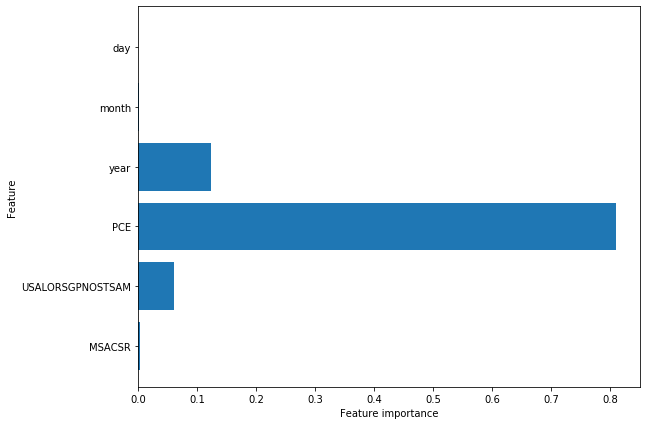

In [49]:
plt.figure(figsize=(9,7))
n_features = x_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), x_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [50]:
feature = SequentialFeatureSelector(linear,k_features = 4,forward = False, verbose = 1, scoring='neg_mean_squared_error')
feature.fit(x,y)
feature_names = list(feature.k_feature_names_)
feature_names

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
Features: 8/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
Features: 7/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
Features: 6/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished
Features: 5/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
Features: 4/4

['USALORSGPNOSTSAM', 'PCE', 'DFF', 'year']

In [51]:
feature = SequentialFeatureSelector(forest,k_features = 4,forward = False, verbose = 1, scoring='neg_mean_squared_error')
feature.fit(x,y)
feature_names = list(feature.k_feature_names_)
feature_names

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   15.4s finished
Features: 8/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   13.8s finished
Features: 7/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   11.5s finished
Features: 6/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.9s finished
Features: 5/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.2s finished
Features: 4/4

['PCE', 'year', 'month', 'day']

In [52]:
feature = SequentialFeatureSelector(gbr,k_features = 4,forward = False, verbose = 1, scoring='neg_mean_squared_error')
feature.fit(x,y)
feature_names = list(feature.k_feature_names_)
feature_names

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.1s finished
Features: 8/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.5s finished
Features: 7/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.0s finished
Features: 6/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.5s finished
Features: 5/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.0s finished
Features: 4/4

['PCE', 'year', 'month', 'day']

In [53]:
# 3rd iteration with one further decreased number of features
df2= df.copy()
df2.drop(['DFF','UNRATE','MORTGAGE30US','month','day'],axis =1,inplace =True)  
df2.head()

,Date,CSUSHPISA,MSACSR,USALORSGPNOSTSAM,PCE,year
0,2000-01-01,4.610665,1.458615,4.620236,8.786136,2000
1,2000-02-01,4.618471,1.458615,4.620850,8.798651,2000
2,2000-03-01,4.626207,1.458615,4.621598,8.807846,2000
3,2000-04-01,4.633971,1.481605,4.622313,8.806739,2000
4,2000-05-01,4.641280,1.481605,4.622735,8.811310,2000


In [54]:
df2.corr()

,CSUSHPISA,MSACSR,USALORSGPNOSTSAM,PCE,year
CSUSHPISA,1.000000,0.338434,-0.052400,0.880041,0.837057
MSACSR,0.338434,1.000000,0.132679,0.329559,0.255616
USALORSGPNOSTSAM,-0.052400,0.132679,1.000000,-0.108819,-0.192097
PCE,0.880041,0.329559,-0.108819,1.000000,0.989374
year,0.837057,0.255616,-0.192097,0.989374,1.000000


In [55]:
y2 = df2['CSUSHPISA']
x2 = df2.drop(['CSUSHPISA','Date'],axis=1)
x.shape,y.shape

((276, 9), (276,))

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x2,y2,random_state = 1,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((220, 4), (56, 4), (220,), (56,))

In [57]:
# Linear Regression
linear.fit(x_train,y_train)
predict_linear = linear.predict(x_test)
r2_score(y_test,predict_linear)

0.7643018404282766

In [58]:
# Gradient Boosting Regressor
gbr.fit(x_train,y_train)
predict_gbr=gbr.predict(x_test)
r2_score(y_test,predict_gbr)

0.959922402031285

In [59]:
# Random Forest Regressor
forest.fit(x_train,y_train)
predict_forest = forest.predict(x_test)
r2_score(y_test,predict_forest)

0.9832507025744224

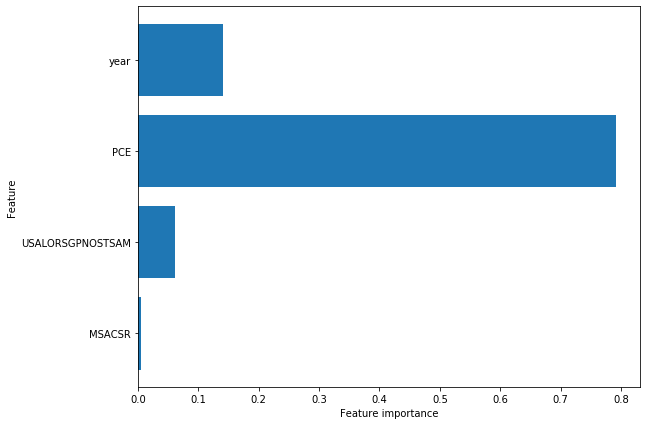

In [60]:
plt.figure(figsize=(9,7))
n_features = x_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), x_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [61]:
feature = SequentialFeatureSelector(linear,k_features = 3,forward = False, verbose = 1, scoring='neg_mean_squared_error')
feature.fit(x,y)
feature_names = list(feature.k_feature_names_)
feature_names

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
Features: 8/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
Features: 7/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
Features: 6/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished
Features: 5/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
Features: 4/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
Features: 3/3

['USALORSGPNOSTSAM', 'PCE', 'DFF']

In [62]:
feature = SequentialFeatureSelector(forest,k_features = 3,forward = False, verbose = 1, scoring='neg_mean_squared_error')
feature.fit(x,y)
feature_names = list(feature.k_feature_names_)
feature_names

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   15.8s finished
Features: 8/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   12.8s finished
Features: 7/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   10.7s finished
Features: 6/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.0s finished
Features: 5/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.2s finished
Features: 4/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.6s finished
Features: 3/3

['PCE', 'year', 'day']

In [63]:
feature = SequentialFeatureSelector(gbr,k_features = 3,forward = False, verbose = 1, scoring='neg_mean_squared_error')
feature.fit(x,y)
feature_names = list(feature.k_feature_names_)
feature_names

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.3s finished
Features: 8/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.8s finished
Features: 7/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.0s finished
Features: 6/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.5s finished
Features: 5/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished
Features: 4/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s finished
Features: 3/3

['PCE', 'year', 'day']

In [64]:
# 4th iteration with one further decreased number of features
df3= df.copy()
df3.drop(['USALORSGPNOSTSAM','DFF','MORTGAGE30US','MSACSR','month','day'],axis =1,inplace =True)  
df3.head()

,Date,CSUSHPISA,UNRATE,PCE,year
0,2000-01-01,4.610665,1.386294,8.786136,2000
1,2000-02-01,4.618471,1.410987,8.798651,2000
2,2000-03-01,4.626207,1.386294,8.807846,2000
3,2000-04-01,4.633971,1.335001,8.806739,2000
4,2000-05-01,4.641280,1.386294,8.811310,2000


In [65]:
df3.corr()

,CSUSHPISA,UNRATE,PCE,year
CSUSHPISA,1.000000,-0.326577,0.880041,0.837057
UNRATE,-0.326577,1.000000,-0.138076,-0.097415
PCE,0.880041,-0.138076,1.000000,0.989374
year,0.837057,-0.097415,0.989374,1.000000


In [66]:
y3 = df3['CSUSHPISA']
x3 = df3.drop(['CSUSHPISA','Date'],axis=1)
x.shape,y.shape

((276, 9), (276,))

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x3,y3,random_state = 1,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((220, 3), (56, 3), (220,), (56,))

In [68]:
# Linear Regression
linear.fit(x_train,y_train)
predict_linear = linear.predict(x_test)
r2_score(y_test,predict_linear)

0.7738912627220771

In [69]:
# Gradient Boosting Regressor
gbr.fit(x_train,y_train)
predict_gbr=gbr.predict(x_test)
r2_score(y_test,predict_gbr)

0.9878319844243638

In [70]:
# Random Forest Regressor
forest.fit(x_train,y_train)
predict_forest = forest.predict(x_test)
r2_score(y_test,predict_forest)

0.9761850830745502

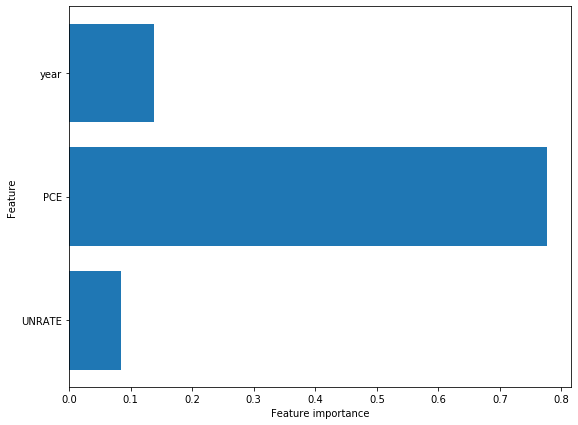

In [71]:
plt.figure(figsize=(9,7))
n_features = x_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), x_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()